In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import os
import sys
parent_dir = os.path.abspath(os.path.join('..'))
sys.path.append(parent_dir)
import _GradComp
import torch

In [2]:
# Folder containing your .pt result files
train_setting = "wd=0.0_lr=5e-5"
results_dir = f"./results/{train_setting}/GC/IF-RAW/Linear"  # Change to your actual path

methods = ["Gaussian", "SJLT", "Random", "Localize", "Loc-256*256_Gaussian", "Loc-256*256_SJLT", "Loc-512*512_Gaussian", "Loc-512*512_SJLT", "Rand-256*256_Gaussian", "Rand-256*256_SJLT", "Rand-512*512_Gaussian", "Rand-512*512_SJLT"]
dims_ = ["16*16", "32*32", "64*64"]
dims = ["$16\\times 16$", "$32\\times 32$", "$64\\times 64$"]

# Initialize dictionaries to store the results
lds_data = {method: [] for method in methods}
throughput_tokens_per_second = {method: [] for method in methods}

# Load results from files
for method in methods:
    for dim in dims_:
        filename = f"{method}-{dim}_thrd-0.0_rdp-0.0.pt"
        filepath = os.path.join(results_dir, filename)
        if os.path.exists(filepath):
            data = torch.load(filepath, weights_only=False)
            lds_data[method].append(data["lds"])
            throughput_tokens_per_second[method].append(data["throughput"]["cache"]["throughput_tokens_per_second"])
            damping = data["best_damping"]
            print(f"Setting: {method}-{dim}: with damping {damping} (lds {data['lds']})")
        else:
            print(f"Warning: {filepath} not found!")
            # Fill in with NaN or some placeholder
            lds_data[method].append(np.nan)
            throughput_tokens_per_second[method].append(np.nan)

# Colors for methods
colors = {
    "Random": 'lightcoral',
    "Localize": 'limegreen',
    "SJLT": 'dodgerblue',
    "Gaussian": 'orange',
    "Rand-256*256_SJLT": 'lightcoral',
    "Rand-256*256_Gaussian": 'lightcoral',
    "Rand-512*512_SJLT": 'lightcoral',
    "Rand-512*512_Gaussian": 'lightcoral',
    "Loc-256*256_SJLT": 'limegreen',
    "Loc-256*256_Gaussian": 'limegreen',
    "Loc-512*512_SJLT": 'limegreen',
    "Loc-512*512_Gaussian": 'limegreen',
}

Setting: Gaussian-16*16: with damping 0.3 (lds 0.1262022290475168)
Setting: Gaussian-32*32: with damping 0.3 (lds 0.19202063284568735)
Setting: Gaussian-64*64: with damping 0.1 (lds 0.24111931465399464)
Setting: SJLT-16*16: with damping 0.1 (lds 0.13116746148405373)
Setting: SJLT-32*32: with damping 0.08 (lds 0.181860721114058)
Setting: SJLT-64*64: with damping 0.3 (lds 0.2434584492994045)
Setting: Random-16*16: with damping 0.005 (lds 0.1015456426436808)
Setting: Random-32*32: with damping 0.5 (lds 0.17949525848069886)
Setting: Random-64*64: with damping 1.0 (lds 0.24569618121827844)
Setting: Localize-16*16: with damping 0.5 (lds 0.1016651149432577)
Setting: Localize-32*32: with damping 1.0 (lds 0.16843820204559262)
Setting: Localize-64*64: with damping 1.0 (lds 0.24355956996007638)
Setting: Loc-256*256_Gaussian-16*16: with damping 0.001 (lds 0.12772923194102856)
Setting: Loc-256*256_Gaussian-32*32: with damping 0.1 (lds 0.18168387740474745)
Setting: Loc-256*256_Gaussian-64*64: with d

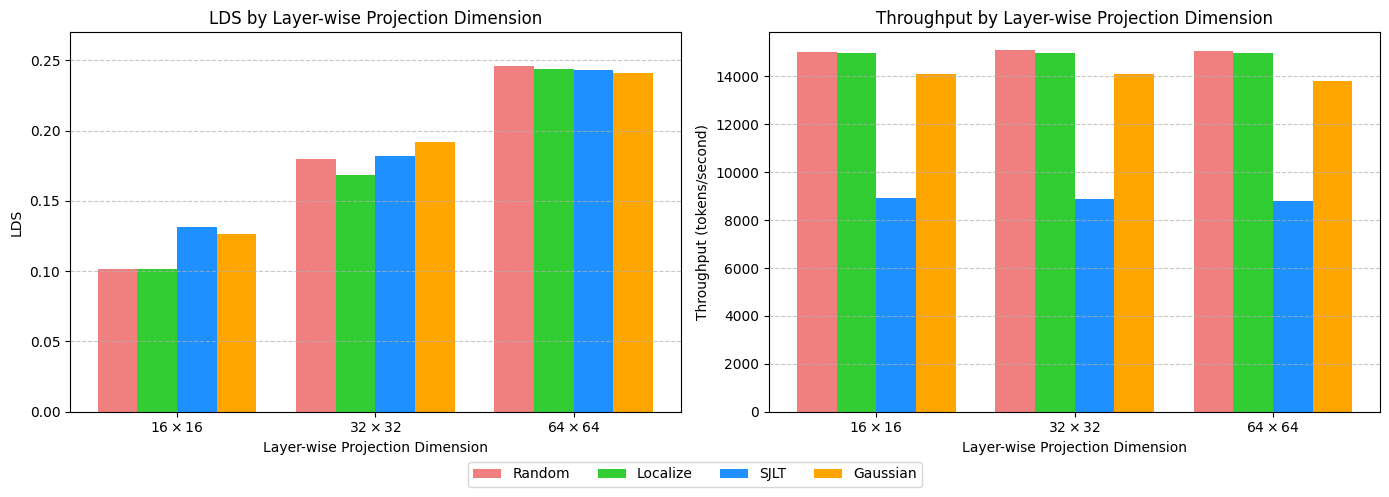

In [3]:
# Bar plot setup
x = np.arange(len(dims))  # one x location per projection dimension
width = 0.2  # Adjusted to fit 4 bars
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Calculate bar positions for 4 methods
pos1 = x - 1.5*width
pos2 = x - 0.5*width
pos3 = x + 0.5*width
pos4 = x + 1.5*width

# LDS subplot
axs[0].bar(pos1, lds_data["Random"], width, label="Random", color=colors["Random"])
axs[0].bar(pos2, lds_data["Localize"], width, label="Localize", color=colors["Localize"])
axs[0].bar(pos3, lds_data["SJLT"], width, label="SJLT", color=colors["SJLT"])
axs[0].bar(pos4, lds_data["Gaussian"], width, label="Gaussian", color=colors["Gaussian"])

axs[0].set_title("LDS by Layer-wise Projection Dimension")
axs[0].set_xlabel("Layer-wise Projection Dimension")
axs[0].set_ylabel("LDS")
axs[0].set_xticks(x)
axs[0].set_xticklabels(dims)
axs[0].set_ylim(0.0, 0.27)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Projection Time subplot (Throughput)
axs[1].bar(pos1, throughput_tokens_per_second["Random"], width, color=colors["Random"])
axs[1].bar(pos2, throughput_tokens_per_second["Localize"], width, color=colors["Localize"])
axs[1].bar(pos3, throughput_tokens_per_second["SJLT"], width, color=colors["SJLT"])
axs[1].bar(pos4, throughput_tokens_per_second["Gaussian"], width, color=colors["Gaussian"])

axs[1].set_title("Throughput by Layer-wise Projection Dimension")
axs[1].set_xlabel("Layer-wise Projection Dimension")
axs[1].set_ylabel("Throughput (tokens/second)")
axs[1].set_xticks(x)
axs[1].set_xticklabels(dims)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Add shared legend
fig.legend(["Random", "Localize", "SJLT", "Gaussian"], loc='upper center', ncol=4, bbox_to_anchor=(0.5, 0.03))
plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for legend
plt.show()

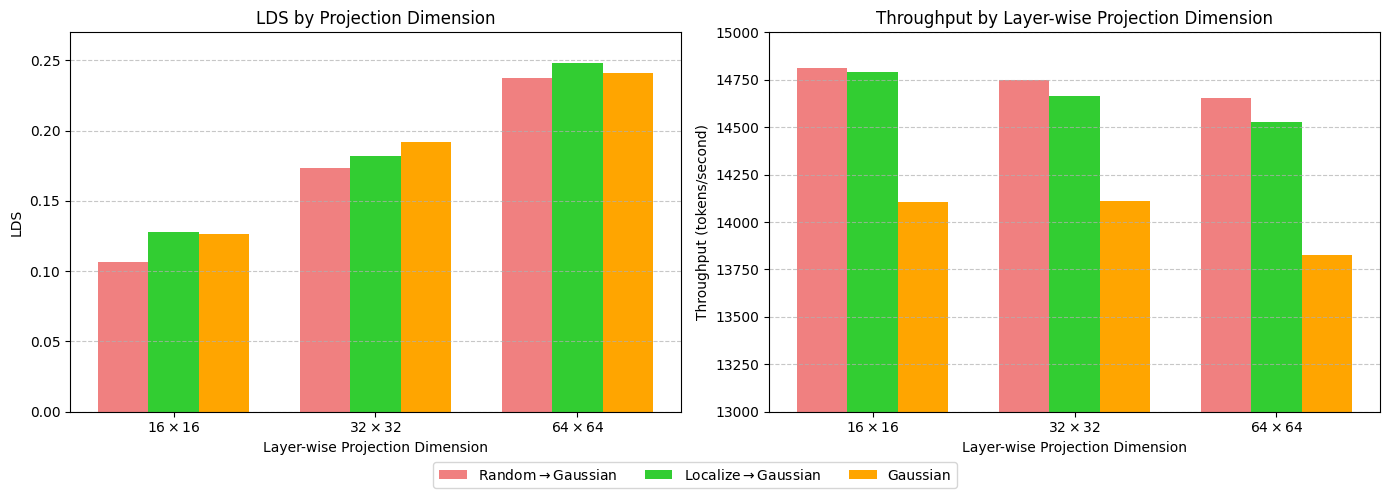

In [4]:
# Bar plot setup
x = np.arange(len(dims))  # one x location per projection dimension
width = 0.25  # Adjusted to fit 3 bars

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Calculate bar positions for 3 methods
pos1 = x - width
pos2 = x
pos3 = x + width

# LDS subplot
axs[0].bar(pos1, lds_data["Rand-256*256_Gaussian"], width, label="Rand-256*256_Gaussian", color=colors["Rand-256*256_Gaussian"])
axs[0].bar(pos2, lds_data["Loc-256*256_Gaussian"], width, label="Loc-256*256_Gaussian", color=colors["Loc-256*256_Gaussian"])
axs[0].bar(pos3, lds_data["Gaussian"], width, label="Gaussian", color=colors["Gaussian"])
axs[0].set_title("LDS by Projection Dimension")
axs[0].set_xlabel("Layer-wise Projection Dimension")
axs[0].set_ylabel("LDS")
axs[0].set_xticks(x)
axs[0].set_xticklabels(dims)
axs[0].set_ylim(0.0, 0.27)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Projection Time subplot
axs[1].bar(pos1, throughput_tokens_per_second["Rand-256*256_Gaussian"], width, color=colors["Rand-256*256_Gaussian"])
axs[1].bar(pos2, throughput_tokens_per_second["Loc-256*256_Gaussian"], width, color=colors["Loc-256*256_Gaussian"])
axs[1].bar(pos3, throughput_tokens_per_second["Gaussian"], width, color=colors["Gaussian"])
axs[1].set_title("Throughput by Layer-wise Projection Dimension")
axs[1].set_xlabel("Layer-wise Projection Dimension")
axs[1].set_ylabel("Throughput (tokens/second)")
axs[1].set_xticks(x)
axs[1].set_xticklabels(dims)
axs[1].set_ylim(13000, 15000)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Add shared legend
fig.legend(["Random$\\to$Gaussian", "Localize$\\to$Gaussian", "Gaussian"], loc='upper center', ncol=3, bbox_to_anchor=(0.5, 0.03))

plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for legend
plt.show()

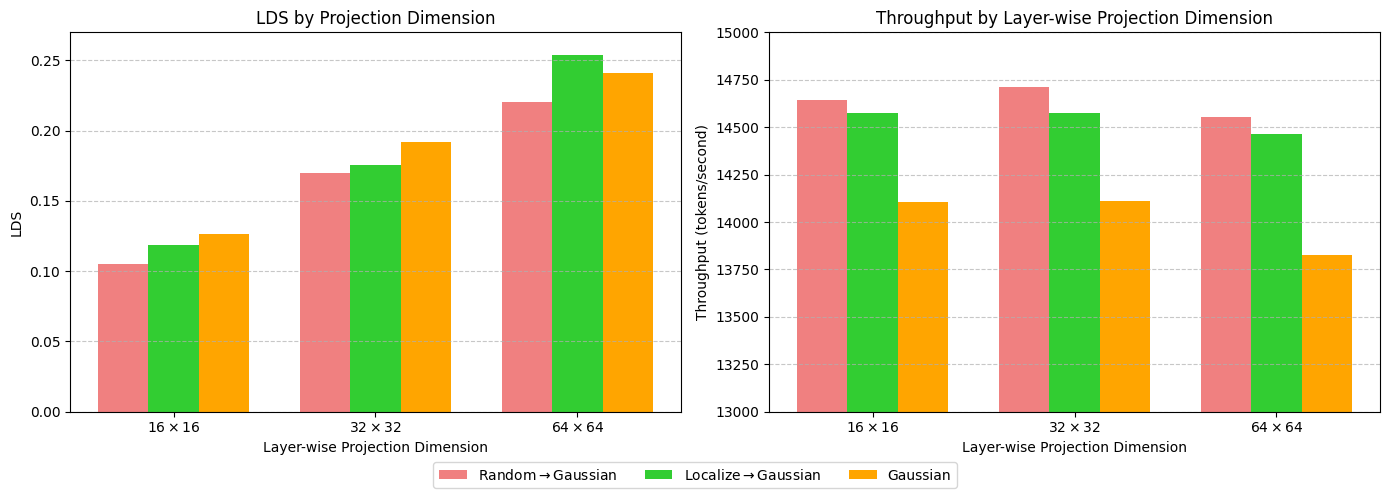

In [5]:
# Bar plot setup
x = np.arange(len(dims))  # one x location per projection dimension
width = 0.25  # Adjusted to fit 3 bars

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Calculate bar positions for 3 methods
pos1 = x - width
pos2 = x
pos3 = x + width

# LDS subplot
axs[0].bar(pos1, lds_data["Rand-512*512_Gaussian"], width, label="Rand-512*512_Gaussian", color=colors["Rand-512*512_Gaussian"])
axs[0].bar(pos2, lds_data["Loc-512*512_Gaussian"], width, label="Loc-512*512_Gaussian", color=colors["Loc-512*512_Gaussian"])
axs[0].bar(pos3, lds_data["Gaussian"], width, label="Gaussian", color=colors["Gaussian"])
axs[0].set_title("LDS by Projection Dimension")
axs[0].set_xlabel("Layer-wise Projection Dimension")
axs[0].set_ylabel("LDS")
axs[0].set_xticks(x)
axs[0].set_xticklabels(dims)
axs[0].set_ylim(0.0, 0.27)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Projection Time subplot
axs[1].bar(pos1, throughput_tokens_per_second["Rand-512*512_Gaussian"], width, color=colors["Rand-512*512_Gaussian"])
axs[1].bar(pos2, throughput_tokens_per_second["Loc-512*512_Gaussian"], width, color=colors["Loc-512*512_Gaussian"])
axs[1].bar(pos3, throughput_tokens_per_second["Gaussian"], width, color=colors["Gaussian"])
axs[1].set_title("Throughput by Layer-wise Projection Dimension")
axs[1].set_xlabel("Layer-wise Projection Dimension")
axs[1].set_ylabel("Throughput (tokens/second)")
axs[1].set_xticks(x)
axs[1].set_xticklabels(dims)
axs[1].set_ylim(13000, 15000)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Add shared legend
fig.legend(["Random$\\to$Gaussian", "Localize$\\to$Gaussian", "Gaussian"], loc='upper center', ncol=3, bbox_to_anchor=(0.5, 0.03))

plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for legend
plt.show()